Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import models, layers, regularizers

In [7]:
DATADIR = "C:/Users/Salman/Desktop/assignment-deep/flowers"
CATEGORIES = ["daisy", "dandelion", "rose", "sunflower", "tulip"]
IMG_SIZE = 150

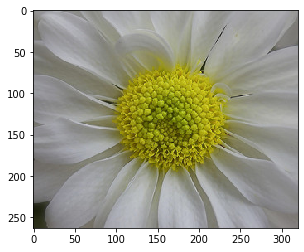

In [8]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array1 = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR) #get full image path & make it GRAY
        plt.imshow(cv2.cvtColor(img_array1, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

In [9]:
img_array1.shape

(263, 320, 3)

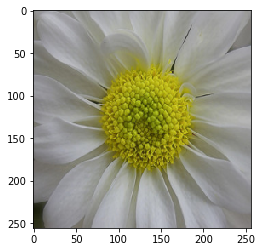

In [10]:
img_array2 = cv2.resize(img_array1, (256, 256))
plt.imshow(cv2.cvtColor(img_array2, cv2.COLOR_BGR2RGB))
plt.show()

In [12]:
full_ds = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        label_img = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                raw_img = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR) #get full image path & make it COLOR
                resized_img = cv2.resize(raw_img, (IMG_SIZE, IMG_SIZE))
                full_ds.append([resized_img, label_img])
            except Exception as e:
                print("Corupted Images: ",os.path.join(DATADIR,category,img))        
create_training_data()

Corupted Images:  C:/Users/Salman/Desktop/assignment-deep/flowers\dandelion\flickr.py
Corupted Images:  C:/Users/Salman/Desktop/assignment-deep/flowers\dandelion\flickr.pyc
Corupted Images:  C:/Users/Salman/Desktop/assignment-deep/flowers\dandelion\run_me.py


In [13]:
np.random.shuffle(full_ds)

In [14]:
x = []
y = []

for features, labels in full_ds:
    x.append(features)
    y.append(labels)
    
    
#x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=32)

In [16]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [17]:
x_train = x_train/255
x_test = x_test/255

In [18]:
model = models.Sequential()
model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3))) # for color
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(8, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(8, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 8)         584       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 8)         584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2312)              0

In [20]:
history = model.fit(x_train, y_train, epochs=100, batch_size=35)

Epoch 1/100
2593/2593 [==============================] - 46s 18ms/sample - loss: 1.5939 - acc: 0.2541
Epoch 2/100
2593/2593 [==============================] - 45s 17ms/sample - loss: 1.4817 - acc: 0.3363
Epoch 3/100
2593/2593 [==============================] - 45s 17ms/sample - loss: 1.2940 - acc: 0.4385
Epoch 4/100
2593/2593 [==============================] - 45s 17ms/sample - loss: 1.1619 - acc: 0.5245
Epoch 5/100
2593/2593 [==============================] - 44s 17ms/sample - loss: 1.1011 - acc: 0.5623
Epoch 6/100
2593/2593 [==============================] - 47s 18ms/sample - loss: 1.0698 - acc: 0.5839
Epoch 7/100
2593/2593 [==============================] - 47s 18ms/sample - loss: 1.0421 - acc: 0.5854
Epoch 8/100
2593/2593 [==============================] - 45s 17ms/sample - loss: 1.0273 - acc: 0.6024
Epoch 9/100
2593/2593 [==============================] - 45s 17ms/sample - loss: 0.9887 - acc: 0.6251
Epoch 10/100
2593/2593 [==============================] - 46s 18ms/sample - loss: 

2593/2593 [==============================] - 24s 9ms/sample - loss: 0.3331 - acc: 0.8828
Epoch 81/100
2593/2593 [==============================] - 23s 9ms/sample - loss: 0.3264 - acc: 0.8797
Epoch 82/100
2593/2593 [==============================] - 25s 10ms/sample - loss: 0.3260 - acc: 0.8727
Epoch 83/100
2593/2593 [==============================] - 24s 9ms/sample - loss: 0.3325 - acc: 0.8766
Epoch 84/100
2593/2593 [==============================] - 23s 9ms/sample - loss: 0.3233 - acc: 0.8723
Epoch 85/100
2593/2593 [==============================] - 24s 9ms/sample - loss: 0.3161 - acc: 0.8847
Epoch 86/100
2593/2593 [==============================] - 23s 9ms/sample - loss: 0.3267 - acc: 0.8866
Epoch 87/100
2593/2593 [==============================] - 24s 9ms/sample - loss: 0.3138 - acc: 0.8943
Epoch 88/100
2593/2593 [==============================] - 26s 10ms/sample - loss: 0.3135 - acc: 0.8816
Epoch 89/100
2593/2593 [==============================] - 36s 14ms/sample - loss: 0.3221 - ac

In [21]:
model.evaluate(x_test, y_test)

1730/1730 [==============================] - 8s 4ms/sample - loss: 1.2284 - acc: 0.6329


[1.228425686896881, 0.632948]

In [22]:
prediction = model.predict(x_test)
prediction

array([[3.8810154e-07, 5.1912208e-10, 4.2730946e-02, 6.2073055e-11,
        9.5726860e-01],
       [3.3809517e-02, 9.3382925e-01, 1.6465178e-02, 2.4986179e-03,
        1.3397359e-02],
       [3.3483062e-05, 1.5513508e-06, 9.5749491e-01, 2.9746801e-08,
        4.2470012e-02],
       ...,
       [4.5993841e-01, 2.8683412e-01, 3.1869844e-02, 2.1913216e-01,
        2.2253492e-03],
       [3.9293584e-05, 5.4952199e-07, 1.4523204e-02, 2.8329134e-07,
        9.8543662e-01],
       [1.1907491e-02, 9.6515501e-01, 1.8253794e-02, 9.5309937e-05,
        4.5884596e-03]], dtype=float32)

In [24]:
prediction[1].sum()

0.99999994